In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
train_set = pd.read_csv('train_70_backgroundTrainTestsplit.csv')
test_set = pd.read_csv('test_30_backgroundTrainTestsplit.csv')
binary_train = pd.read_csv('binary_train_70_backgroundTrainTestsplit.csv')
binary_test = pd.read_csv('binary_test_30_backgroundTrainTestsplit.csv')
backdata = pd.read_csv('backgroundData_backGroundTrainTestsplit.csv')


In [4]:
X_0 = train_set[train_set['prediction'] == 0]
X_0

,userID,itemID,prediction
1,21509,18569,0.0
2,26600,30712,0.0
4,24698,16294,0.0
5,28320,25129,0.0
7,42987,12716,0.0
...,...,...,...
64238,20305,21387,0.0
64239,13714,19959,0.0
64240,22788,8771,0.0
64241,45935,25373,0.0


### Splitting train_set and test_set into X_train, y_train, X_test, y_test

In [3]:
X_train = train_set.drop(columns=['prediction'])
y_train = train_set['prediction']

X_test = test_set.drop(columns = ['prediction'])
y_test = test_set['prediction']

In [4]:
X_train

,userID,itemID
0,45301,461
1,21509,18569
2,26600,30712
3,2,23476
4,24698,16294
...,...,...
64238,20305,21387
64239,13714,19959
64240,22788,8771
64241,45935,25373


### Merging X_train, X_test with features

In [5]:
features = pd.read_csv('IU_FEAT_AverageCycle.csv', index_col = 0)
features

,userID,itemID,average_cycle(weeks),first_week_bought,last_week_bought
0,0,1505,0.0,14,14
1,0,6446,0.0,28,28
3,0,9325,0.0,25,25
4,0,12468,0.0,10,10
5,0,12505,0.0,12,12
...,...,...,...,...,...
1071011,46137,2667,0.0,16,16
1071014,46137,20209,0.0,10,10
1071017,46137,28343,0.0,10,10
1071018,46137,28900,0.0,10,10


In [6]:
X_train_feat = X_train.merge(features, how = 'inner', on = ['userID', 'itemID'])
X_test_feat = X_test.merge(features, how = 'inner', on = ['userID', 'itemID'])
X_train_feat

,userID,itemID,average_cycle(weeks),first_week_bought,last_week_bought
0,45301,461,12.0,3,27
1,21509,18569,17.0,12,29
2,26600,30712,9.0,2,11
3,2,23476,12.0,5,17
4,24698,16294,3.0,19,22
...,...,...,...,...,...
64238,20305,21387,23.0,2,25
64239,13714,19959,23.0,5,28
64240,22788,8771,7.0,12,19
64241,45935,25373,29.0,2,31


In [7]:
X_test_feat

,userID,itemID,average_cycle(weeks),first_week_bought,last_week_bought
0,27630,29657,6.33,4,23
1,45037,15445,12.00,12,24
2,40558,24405,10.00,5,15
3,40577,17489,14.00,1,15
4,2449,5557,11.00,14,25
...,...,...,...,...,...
27529,28263,2787,18.00,7,25
27530,16224,8302,10.00,7,17
27531,11328,7546,8.00,19,27
27532,8262,11434,10.00,14,24


# Training Model
- using features: userID, itemID, average_cycle(weeks),first_week_bought,last_week_bought
- y is prediction column

### Feature scaling

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_feat = sc.fit_transform(X_train_feat)
X_test_feat = sc.transform(X_test_feat)

In [9]:
print(X_train_feat)

[[ 1.66250589 -1.6993443   0.18412886 -0.93296528  0.59465381]
 [-0.12077432  0.21022845  1.01813744  0.44631539  0.91259997]
 [ 0.26081107  1.49076423 -0.31627628 -1.08621869 -1.94891551]
 ...
 [-0.02490951 -0.82301618 -0.64987971  0.44631539 -0.67713085]
 [ 1.71002605  0.92774187  3.01975802 -1.08621869  1.23054614]
 [ 1.09143949 -0.22508833 -1.48388829 -0.16669824 -1.47199627]]


In [10]:
print(X_test_feat)

[[ 0.33801259  1.37950958 -0.76163686 -0.77971187 -0.04123852]
 [ 1.64271832 -0.11921187  0.18412886  0.44631539  0.11773456]
 [ 1.30700412  0.82566177 -0.14947457 -0.62645846 -1.31302318]
 ...
 [-0.88387014 -0.95219812 -0.483078    1.51908925  0.59465381]
 [-1.11367584 -0.54219046 -0.14947457  0.75282221  0.11773456]
 [-1.63587293 -1.11913283  0.18412886  0.5995688   0.27670764]]


# I. Random Forest Classification Model

### Training the Random Forest Classification model on the Training set

In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train_feat, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Predicting the test set result

In [15]:
y_pred = classifier.predict(X_test_feat)


### Making confusion matrix and calculating accuracy score

In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)
ac = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {ac}")

preci = precision_score(y_test, y_pred, average = None)
print(f"Precision score: {preci}")

recall = recall_score(y_test, y_pred, average = None)
print(f"Recall score: {recall}")

f1_sc = f1_score(y_test, y_pred, average = None)
print(f"f1 score: {f1_sc}")

Confusion matrix:
[[21987   176   121   178   178]
 [ 1051    40    31    31    24]
 [ 1021    21    34    29    22]
 [ 1083    22    24    47    33]
 [ 1249    23    33    35    41]]
Accuracy score: 0.804423621704075
Precision score: [0.83312493 0.14184397 0.1399177  0.146875   0.13758389]
Recall score: [0.97115724 0.03398471 0.03016859 0.0388751  0.02968863]
f1 score: [0.89686117 0.05483208 0.04963504 0.06147809 0.04883859]


# II. Decision Tree Classification Model 

### Training the Decision Tree Classification model on the Training set

In [17]:
from sklearn.tree import DecisionTreeClassifier
cl_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
cl_tree.fit(X_train_feat, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### Predicting the test set result

In [18]:
y_pred_tree = cl_tree.predict(X_test_feat)

### Making the confusion matrix

In [19]:
cm_tree = confusion_matrix(y_test, y_pred_tree)
print('Confusion matrix:')
print(cm_tree)

ac_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy score: {ac_tree}")

preci_tree = precision_score(y_test, y_pred_tree, average = None)
print(f"Precision score: {preci_tree}")

recall_tree = recall_score(y_test, y_pred_tree, average = None)
print(f"Recall score: {recall_tree}")

f1_sc_tree = f1_score(y_test, y_pred_tree, average = None)
print(f"f1 score: {f1_sc_tree}")

Confusion matrix:
[[18722   891   868  1004  1155]
 [  822   110    86    84    75]
 [  762    85   108    95    77]
 [  827    75    88   130    89]
 [ 1003    75    76    90   137]]
Accuracy score: 0.6975739086220673
Precision score: [0.84577159 0.08899676 0.08809135 0.09265859 0.08936725]
Recall score: [0.82694346 0.09345794 0.09582964 0.10752688 0.09920348]
f1 score: [0.83625156 0.09117281 0.09179771 0.09954058 0.09402883]


### Using GridSearchCV

In [20]:
# Code of Leon
from sklearn.model_selection import GridSearchCV
dTree = DecisionTreeClassifier()
params = {'criterion' : ['gini', 'entropy'], 
          'min_samples_split' : np.arange(2, 5),
          'min_samples_leaf' : np.arange(1, 3),
          'max_leaf_nodes' : np.arange(2, 5),
          'max_depth' : np.arange(2, 5)}
clf = GridSearchCV(estimator=dTree, param_grid=params, error_score='raise', n_jobs=-1)
clf.fit(X_train_feat, y_train)
clf.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [21]:
amt_correct_0 = y_test[y_test == 0].shape[0]
amt_correct_1 = y_test[y_test == 1].shape[0]
amt_correct_2 = y_test[y_test == 2].shape[0]
amt_correct_3 = y_test[y_test == 3].shape[0]
amt_correct_4 = y_test[y_test == 4].shape[0]

acc_0 = amt_correct_0 / y_test.shape[0] * 100
acc_1 = amt_correct_1 / y_test.shape[0] * 100
acc_2 = amt_correct_2 / y_test.shape[0] * 100
acc_3 = amt_correct_3 / y_test.shape[0] * 100
acc_4 = amt_correct_4 / y_test.shape[0] * 100

print(f'The accuracy of the constant 0 predictor is {acc_0:.2f}%')
print(f'The accuracy of the constant 1 predictor is {acc_1:.2f}%')
print(f'The accuracy of the constant 2 predictor is {acc_2:.2f}%')
print(f'The accuracy of the constant 3 predictor is {acc_3:.2f}%')
print(f'The accuracy of the constant 4 predictor is {acc_4:.2f}%')
print(f'Our model prediction baseline will therefore be {max(acc_0, acc_1, acc_2, acc_3, acc_4):.2f}%')

The accuracy of the constant 0 predictor is 82.23%
The accuracy of the constant 1 predictor is 4.27%
The accuracy of the constant 2 predictor is 4.09%
The accuracy of the constant 3 predictor is 4.39%
The accuracy of the constant 4 predictor is 5.02%
Our model prediction baseline will therefore be 82.23%


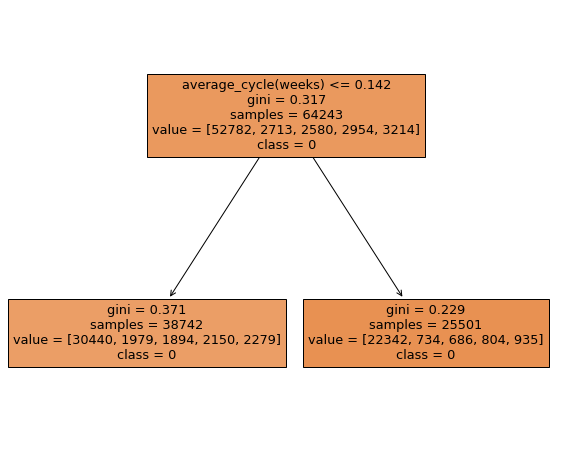

In [22]:
from sklearn import tree
fig = plt.figure(figsize=(10, 8))
_ = tree.plot_tree(clf.best_estimator_, 
                   feature_names = np.array(features.columns),  
                   class_names=["0", "1", '2', '3', '4'],
                   filled=True)

# III. Support Vector Machine Model

### Training the SVM model on the Training set

In [23]:
from sklearn.svm import SVC
cl_svm = SVC(kernel='linear', random_state=0)
cl_svm.fit(X_train_feat, y_train)

SVC(kernel='linear', random_state=0)

### Predicting the test set result

In [24]:
y_pred_svm = cl_svm.predict(X_test_feat)

### Making confusion matrix and calculating accuracy score

In [25]:
cm_svm = confusion_matrix(y_test, y_pred_svm)
print('Confusion matrix:')
print(cm_svm)

ac_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy score: {ac_svm}")

preci_svm = precision_score(y_test, y_pred_svm, average = None)
print(f"Precision score: {preci_svm}")

recall_svm = recall_score(y_test, y_pred_svm, average = None)
print(f"Recall score: {recall_svm}")

f1_sc_svm = f1_score(y_test, y_pred_svm, average = None)
print(f"f1 score: {f1_sc_svm}")

Confusion matrix:
[[22640     0     0     0     0]
 [ 1177     0     0     0     0]
 [ 1127     0     0     0     0]
 [ 1209     0     0     0     0]
 [ 1381     0     0     0     0]]
Accuracy score: 0.8222561197065447
Precision score: [0.82225612 0.         0.         0.         0.        ]
Recall score: [1. 0. 0. 0. 0.]
f1 score: [0.90245944 0.         0.         0.         0.        ]


C:\Users\dream\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# IV. Logistic Regression Model

### Training model on the training set

In [26]:
from sklearn.linear_model import LogisticRegression
cl_reg = LogisticRegression(random_state = 0)
cl_reg.fit(X_train_feat, y_train)

LogisticRegression(random_state=0)

### Predicting the test set result

In [27]:
y_pred_reg = cl_reg.predict(X_test_feat)

### Making confusion matrix and evaluating scores

In [28]:
cm_reg = confusion_matrix(y_test, y_pred_reg)
print('Confusion matrix:')
print(cm_reg)

ac_reg = accuracy_score(y_test, y_pred_reg)
print(f"Accuracy score: {ac_reg}")

preci_reg = precision_score(y_test, y_pred_reg, average = None)
print(f"Precision score: {preci_reg}")

recall_reg = recall_score(y_test, y_pred_reg, average = None)
print(f"Recall score: {recall_reg}")

f1_sc_reg = f1_score(y_test, y_pred_reg, average = None)
print(f"f1 score: {f1_sc_reg}")

Confusion matrix:
[[22640     0     0     0     0]
 [ 1177     0     0     0     0]
 [ 1127     0     0     0     0]
 [ 1209     0     0     0     0]
 [ 1381     0     0     0     0]]
Accuracy score: 0.8222561197065447
Precision score: [0.82225612 0.         0.         0.         0.        ]
Recall score: [1. 0. 0. 0. 0.]
f1 score: [0.90245944 0.         0.         0.         0.        ]


C:\Users\dream\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# V. K-Nearest Neighbors (KNN) Model

### Training the model on the training set

In [29]:
from sklearn.neighbors import KNeighborsClassifier
cl_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
cl_knn.fit(X_train_feat, y_train)

KNeighborsClassifier()

### Predicting the test set result

In [31]:
y_pred_knn = cl_knn.predict(X_test_feat)

### Making confusion matrix and evaluating scores

In [32]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
print('Confusion matrix:')
print(cm_knn)

ac_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy score: {ac_knn}")

preci_knn = precision_score(y_test, y_pred_knn, average = None)
print(f"Precision score: {preci_knn}")

recall_knn = recall_score(y_test, y_pred_knn, average = None)
print(f"Recall score: {recall_knn}")

f1_sc_knn = f1_score(y_test, y_pred_knn, average = None)
print(f"f1 score: {f1_sc_knn}")

Confusion matrix:
[[22268    98    85   103    86]
 [ 1103    23    17    20    14]
 [ 1053    15    22    23    14]
 [ 1125    16    19    26    23]
 [ 1284    18    22    35    22]]
Accuracy score: 0.8121231931430232
Precision score: [0.82987366 0.13529412 0.13333333 0.12560386 0.13836478]
Recall score: [0.9835689  0.01954121 0.01952085 0.02150538 0.01593049]
f1 score: [0.90020819 0.03414996 0.03405573 0.03672316 0.02857143]


# VI. Naive Bayes Model

### Training the model on the training set

In [33]:
from sklearn.naive_bayes import GaussianNB
cl_nb = GaussianNB()
cl_nb.fit(X_train_feat, y_train)

GaussianNB()

### Predicting the test set result

In [34]:
y_pred_nb = cl_nb.predict(X_test_feat)

### Making confusion matrix and evaluating scores

In [35]:
cm_nb = confusion_matrix(y_test, y_pred_nb)
print('Confusion matrix:')
print(cm_nb)

ac_nb = accuracy_score(y_test, y_pred_nb)
print(f"Accuracy score: {ac_nb}")

preci_nb = precision_score(y_test, y_pred_nb, average = None)
print(f"Precision score: {preci_nb}")

recall_nb = recall_score(y_test, y_pred_nb, average = None)
print(f"Recall score: {recall_nb}")

f1_sc_nb = f1_score(y_test, y_pred_nb, average = None)
print(f"f1 score: {f1_sc_nb}")

Confusion matrix:
[[22640     0     0     0     0]
 [ 1177     0     0     0     0]
 [ 1127     0     0     0     0]
 [ 1209     0     0     0     0]
 [ 1381     0     0     0     0]]
Accuracy score: 0.8222561197065447
Precision score: [0.82225612 0.         0.         0.         0.        ]
Recall score: [1. 0. 0. 0. 0.]
f1 score: [0.90245944 0.         0.         0.         0.        ]


C:\Users\dream\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
